# Projek Akhir Kecerdasan Buatan | Kelompok 2 - A2
## Klasifikasi Pizza or Not Pizza
### Nama:
#### - Agditha Evalyn Lolongan (2109106030) 
#### - Ibnu Yafi Arya Wardana (2109106039)
#### - Novia Indah Ramadhani (2109106041)
### Link Dataset : https://www.kaggle.com/datasets/carlosrunner/pizza-not-pizza

## Table of Contents
* #### Pendahuluan
    * [Penjelasan Project](#penjelasanProject)
    * [Import Library](#importLibrary)
* #### [Bagian 1: Data Collecting](#bag1)
    * [Penyimpanan Address](#bag1_1)
    * [Jumlah Data](#bag1_2)
* #### [Bagian 2: Data Preprocessing](#bag2)
    * [Data Splitting](#bag2_1)
        * [Split Folder](#bag2_1_1)
        * [Jumlah Data](#bag2_1_2)
        * [Rasio Split](#bag2_1_3)
    * [Augmentasi](#bag2_2)
* #### [Bagian 3: Data Analysis & Visualisasi](#bag3)
    * [Visualisasi Dataset](#bag3_1)
    * [Metadata](#bag3_2)
* #### [Bagian 4: Data Modelling](#bag4)
    * [Pembuatan Model](#bag4_1)
    * [Summary Model](#bag4_2)
    * [Compile Model](#bag4_3)
    * [Proses Melatih Model](#bag4_4)
* #### [Bagian 5: Evaluasi](#bag5)
    * [Evaluasi Model](#bag5_1)
    * [Save Model](#bag5_2)
    * [Visualisasi Model](#bag5_3)
        * [Visualisasi Model LinePlot](#bag5_3_1)
        * [Visualisasi Suplot Model Validation](#bag5_3_2)
        * [Visualisasi C. Matrix Model Validation](#bag5_3_3)
* #### [Bagian 6: Prediksi Data Test](#bag6)
    * [Import Data Test](#bag6_1)
    * [Evaluasi Data Test](#bag6_2)
    * [Visualisasi Data Test](#bag6_3)
        * [Subplot Prediksi Data Test](#bag6_3_1)
        * [C. Matrix Prediksi Data Test](#bag6_3_2)

<a class="anchor" id="penjelasanProject"></a>
## Penjelasan Project

- Dataset ini merupakan bagian dari Food-101 dataset. Informasi mengenai dataset asli dapat ditemukan pada makalah berikut: Bossard, Lukas, Matthieu Guillaumin, and Luc Van Gool. "Food-101 – Mining Discriminative Components with Random Forests." In European conference on computer vision, pp. 446-461. Springer, Cham, 2014.
- Dataset bersumber dari Kaggle yang terdiri dari 1936 sampel dan terbagi menjadi dua kelas, yaitu Pizza dan Not Pizza. Adapun jumlah data training yang digunakan sebanyak 1550 sampel, dan data validation sebanyak 386 sampel.
- Penjelasan Project: Project ini dibuat dengan tujuan menerapkan metode Convolutional Neural Network (CNN) agar dapat mengklasifikasi suatu gambar apakah  gambar tersebut merupakan sebuah pizza atau bukan pizza.


<a class="anchor" id="importLibrary"></a>
## Import Library

In [4]:
from tensorflow import keras
from keras_preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import os # Buat perintah seperti di cmd
import shutil # Buat copas 
import random
import tensorflow_datasets as tfds

<a class="anchor" id="bag1"></a>
# [1] Data Collecting

<a class="anchor" id="bag1_1"></a>
### Penyimpanan address
Menyimpan address dari dataset pada suatu variabel untuk menghindari penulisan  
berulang agar memudahkan pembacaan dan pembuatan program

In [5]:
root_path = r'C:\Users\ASUS\venv_A2-21\Novia_041\PA_KB_LAGI'
source_path = r'C:\Users\ASUS\venv_A2-21\Novia_041\PA_KB_LAGI\pizza_not_pizza'

#root_path = r'D:\data c dita\Agditha Informatika\semester3\Kecerdasan buatan\PA_KB'
#source_path = r'D:\data c dita\Agditha Informatika\semester3\Kecerdasan buatan\PA_KB\pizza_not_pizza'

# root_path = r'C:\Users\MSi-GAMING\PA_KB'
# source_path = r'C:\Users\MSi-GAMING\PA_KB\pizza_not_pizza'

destination = os.path.join(root_path, 'data_used')

<a class="anchor" id="bag1_2"></a>
### Jumlah Data
Menampilkan banyaknya data di dalam folder dataset  
untuk masing-masing folder / label di dalamnya

In [6]:
# Cek jumlah data pada folder
folders = {}

for folder in os.listdir('pizza_not_pizza'):
    folders[folder] = len(os.listdir(os.path.join(source_path, folder)))
    
print(f'Total Images: {folders}')

Total Images: {'not_pizza': 983, 'pizza': 953}


<a class="anchor" id="bag2"></a>
# [2] Data Preprocessing

<a class="anchor" id="bag2_1"></a>
## Data Splitting

<a class="anchor" id="bag2_1"></a>
### Pembuatan Folder untuk menyimpan hasil splitting
Folder nantinya akan diisi dengan data hasil split baik train maupun validation.

In [7]:
# Siapkan directory 'Augmented'
if os.path.isdir('data_used'):
    shutil.rmtree('data_used')
else:
    pass

# Buat folder baru
os.makedirs(os.path.join(destination, 'training'))
for kelas in folders.keys():
    os.makedirs(os.path.join(destination, f'training/{kelas}'))
    
os.makedirs(os.path.join(destination, 'validation'))
for kelas in folders.keys():
    os.makedirs(os.path.join(destination, f'validation/{kelas}'))
    
os.makedirs(os.path.join(destination, 'test'))
for kelas in folders.keys():
    os.makedirs(os.path.join(destination, f'test/{kelas}'))

<a class="anchor" id="bag2_1_2"></a>
### Simpan nama data ke List
Memasukkan nama data ke list dan mengabaikan data corrupt.

In [8]:
files_pizza = []
files_not_pizza = []

#Cek data corrupt yg uk = 0
for file in os.listdir(os.path.join(source_path, "Pizza")):
    if os.path.getsize(os.path.join(source_path, f'Pizza/{file}')):
        files_pizza.append(file)
    else:
        pass
        

        
for file in os.listdir(os.path.join(source_path, "Not_Pizza")):
    if os.path.getsize(os.path.join(source_path, f'Not_Pizza/{file}')):
        files_not_pizza.append(file)
    else:
        pass

<a class="anchor" id="bag2_1_3"></a>
### Merasiokan Data Split
Data pada list diacak, lalu dibagi
dengan rasio perbandingan yang diinginkan.

In [9]:
files_pizza = random.sample(files_pizza, len(files_pizza))
files_not_pizza = random.sample(files_not_pizza, len(files_not_pizza))

split = 0.2

def bagi(listnya, potongnya):
    return int(-len(listnya) * potongnya)


# Cara bagi
files_pizza_training = files_pizza[:bagi(files_pizza, split)]
files_not_pizza_training = files_not_pizza[:bagi(files_not_pizza, split)]
files_pizza_validation = files_pizza[bagi(files_pizza, split):]
files_not_pizza_validation = files_not_pizza[bagi(files_not_pizza, split):]


# Test Data (Untuk Predict)
files_test_conc = files_pizza + files_not_pizza
files_test_conc = random.sample(files_test_conc, len(files_test_conc))
files_test = files_test_conc[bagi(files_test_conc, 0.1):]

In [10]:
for file in files_pizza_training:
    shutil.copyfile(
        os.path.join(source_path, f'pizza/{file}'),
        os.path.join(destination, f'training/pizza/{file}')
    )
    
for file in files_not_pizza_training:
    shutil.copyfile(
        os.path.join(source_path, f'not_pizza/{file}'),
        os.path.join(destination, f'training/not_pizza/{file}')
    )

for file in files_pizza_validation:
    shutil.copyfile(
        os.path.join(source_path, f'pizza/{file}'),
        os.path.join(destination, f'validation/pizza/{file}')
    )
    
for file in files_not_pizza_validation:
    shutil.copyfile(
        os.path.join(source_path, f'not_pizza/{file}'),
        os.path.join(destination, f'validation/not_pizza/{file}')
    )
    
    
for file in files_test:
    if(os.path.isfile(os.path.join(source_path, f'pizza/{file}'))):
        shutil.copyfile(
            os.path.join(source_path, f'pizza/{file}'),
            os.path.join(destination, f'test/pizza/{file}')
        )
    else:
        shutil.copyfile(
            os.path.join(source_path, f'not_pizza/{file}'),
            os.path.join(destination, f'test/not_pizza/{file}')
        )

<a class="anchor" id="bag2_2"></a>
## Proses Augmentasi 
- Rescale
- Horizontal Flip
- Brightness
- Fill mode 'nearest' : Nearest: nilai piksel terdekat dari wilayah yang tidak memiliki nilai dipilih dan diulang. Misalnya, aaaaaaaa | abcd | dddddddd.

In [11]:
train_path = os.path.join(destination, 'training')
val_path = os.path.join(destination, 'validation')

In [12]:
# AUGMENTASI

# Siapkan directory 'Augmented'
if os.path.isdir('Augmented'):
    shutil.rmtree('Augmented')
    os.makedirs('Augmented')
else:
    os.makedirs('Augmented')

# Inisialisasi menggunakan Image Data Generator
dgen = ImageDataGenerator(
    rescale = 1./255,    #Normalisasi -> Nilai 1/255 artinya setiap nilai akan dikali 1/255 sehingga nilainya akan berubah menjadi antara 0 dan 1
    horizontal_flip = True, 
    brightness_range=[1.0, 1.2], 
    fill_mode = 'nearest'
)

# Load Data
targetSize = (120, 120) #Resize


# Training
print("TRAINING")
ds_train = dgen.flow_from_directory(
    train_path,
    target_size = targetSize,
    batch_size = 16,
    shuffle = True,
    seed=0,
    class_mode='binary',
    save_to_dir = 'Augmented',
    save_format = 'jpg'
)

print(" Dengan Shape:", ds_train[0][0].shape)

# Validation
print("\nVALIDATION")
ds_val = dgen.flow_from_directory(
    val_path,
    target_size = targetSize,
    batch_size = 16,
    shuffle = True,
    seed=0,
    class_mode='binary',
    save_to_dir = 'Augmented',
    save_format = 'jpg'
)

print("-- Dengan Shape:", ds_val[0][0].shape)

TRAINING
Found 1550 images belonging to 2 classes.
 Dengan Shape: (16, 120, 120, 3)

VALIDATION
Found 386 images belonging to 2 classes.
-- Dengan Shape: (16, 120, 120, 3)


In [15]:
class_names=['not_pizza', 'pizza']

<a class="anchor" id="bag3"></a>
# [3] Data Analysis & Visualisasi

In [16]:
if os.path.isdir(os.path.join(root_path, 'Augmented')):
    pass
else:
    os.makedirs(os.path.join(root_path, 'Augmented'))

<a class="anchor" id="bag3_1"></a>
### Visualisasi Dataset

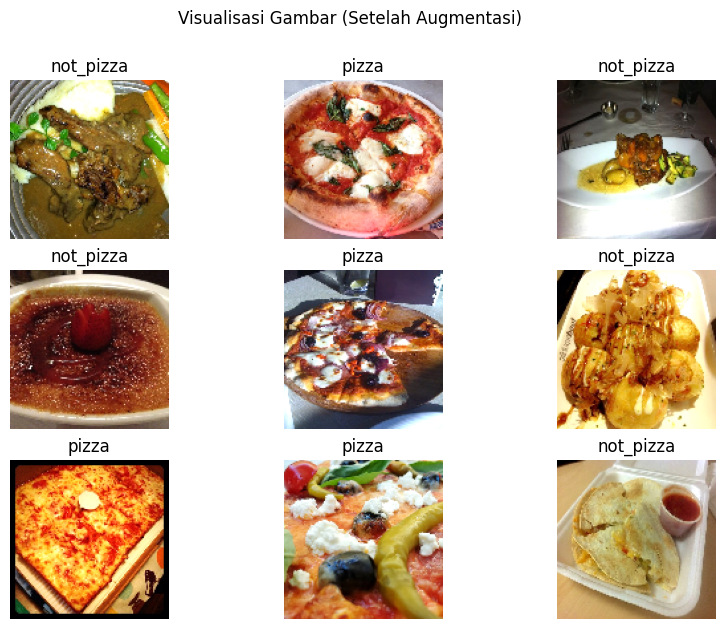

In [17]:
plt.figure(figsize=(10,7))
plt.suptitle('Visualisasi Gambar (Setelah Augmentasi)')

for i in range(9):
    plt.subplot(3, 3, i+1)
    img, label = ds_train.next()
    plt.imshow(img[0])
    plt.axis("off")
    plt.title(class_names[int(label[0])])
    
plt.show()

<a class="anchor" id="bag3_2"></a>
### Metadata (Informasi)

In [18]:
print ("================== METADATA ==================")

# Membuat Table Metadata
from prettytable import PrettyTable

table1 = PrettyTable(["Atribut", "Isi"])
table1.align = "l"

# Kelas yang ada
Daftar_kelas = ""
for i in range(len(class_names)):
    Daftar_kelas += class_names[i]
    if i != len(class_names)-1:
        Daftar_kelas += ", "

# Ukuran Data
size = 0
for path, dirs, files in os.walk(source_path):
    for f in files:
        fp = os.path.join(path, f)
        size += os.path.getsize(fp)

# Jumlah Data
sum_train = len(files_pizza_training) + len(files_not_pizza_training)
sum_val = len(files_pizza_validation) + len(files_not_pizza_validation)

# Penampil
table1.add_row(["Nama Dataset", "Pizza or Not Pizza"])
table1.add_row(["Kelas", Daftar_kelas])
table1.add_row(["Ukuran (KB)", size])
table1.add_row(["Jumlah Data Dataset", sum_train + sum_val])
table1.add_row(["Jumlah Data Train", sum_train])
table1.add_row(["Jumlah Data Validation", sum_val])

print(table1)

================== METADATA ==================
+------------------------+--------------------+
| Atribut                | Isi                |
+------------------------+--------------------+
| Nama Dataset           | Pizza or Not Pizza |
| Kelas                  | not_pizza, pizza   |
| Ukuran (KB)            | 106255598          |
| Jumlah Data Dataset    | 1936               |
| Jumlah Data Train      | 1550               |
| Jumlah Data Validation | 386                |
+------------------------+--------------------+


<a class="anchor" id="bag4"></a>
# [4] Data Modelling

In [19]:
# Import Library yang digunakan

from keras import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

<a class="anchor" id="bag4_1"></a>
## Pembuatan Model

#### [1] Input Layer
- Menggunakan Convolution 2D
- Fungsi aktivasi relu
- Input shape 120,120,3

#### [2] Hidden Layer
- Melakukan proses pooling sebanyak 4 kali dengan matriks 2x2 (Pooling adalah proses mengurangi ukuran/resolusi pada gambar akan tetapi tetap mempertahankan informasi penting pada gambar tersebut.)
- Layer Flatten (Proses flattening. Data pooling dimiliki berupa array 2 dimensi, kemudian dikonversi menjadi data satu dimensi single vector.)
- Layer Dense 256 

#### [3] Output Layer
- Layer Dense 1 filter dengan aktivasi sigmoid -> Hanya berupa satu node karena klasifikasi ini termasuk dalam binary classification.

In [20]:
model = Sequential()

#INPUT LAYER
model.add(Conv2D(256, 3, 
            activation='relu',
            input_shape = [120,120,3]))

#HIDDEN LAYER
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,3,activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))

#OUTPUT LAYER
model.add(Dense(1, activation='sigmoid'))

<a class="anchor" id="bag4_2"></a>
## Model Summary

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 118, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 59, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0

<a class="anchor" id="bag4_3"></a>
## Compile Model
- Parameter optimisasi menggunakan metode adam
- Parameter loss untuk menentukan loss function menggunakan metode Binary Crossentropy
- Parameter metrics untuk menentukan performa metric berdasarkan accuracy

In [22]:
model.compile('adam', loss='binary_crossentropy', metrics=['accuracy'])

<a class="anchor" id="bag4_4"></a>
## Proses Melatih Model
- Menggunakan fungsi callback : Ketika akurasi > 0.90 dan akurasi validation > 0.80 maka epochs terhenti
- Model dilatih dengan data train dan divalidasi dengan data val

In [23]:
class mengCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.90 and logs.get('val_accuracy') > 0.80):
            self.model.stop_training = True

In [24]:
hasil = model.fit(ds_train,batch_size=16, epochs=100, validation_data=ds_val, callbacks = [mengCallback()])

Epoch 1/100
97/97 [==============================] - 148s 2s/step - loss: 0.6733 - accuracy: 0.5832 - val_loss: 0.5980 - val_accuracy: 0.6891
Epoch 2/100
97/97 [==============================] - 140s 1s/step - loss: 0.6229 - accuracy: 0.6510 - val_loss: 0.6315 - val_accuracy: 0.7098
Epoch 3/100
97/97 [==============================] - 139s 1s/step - loss: 0.5920 - accuracy: 0.6935 - val_loss: 0.5274 - val_accuracy: 0.7358
Epoch 4/100
97/97 [==============================] - 142s 1s/step - loss: 0.5584 - accuracy: 0.7310 - val_loss: 0.4564 - val_accuracy: 0.7876
Epoch 5/100
97/97 [==============================] - 141s 1s/step - loss: 0.5301 - accuracy: 0.7606 - val_loss: 0.4872 - val_accuracy: 0.7668
Epoch 6/100
97/97 [==============================] - 136s 1s/step - loss: 0.5292 - accuracy: 0.7477 - val_loss: 0.4682 - val_accuracy: 0.7720
Epoch 7/100
97/97 [==============================] - 139s 1s/step - loss: 0.4672 - accuracy: 0.8013 - val_loss: 0.4579 - val_accuracy: 0.7953
Epoch 

<a class="anchor" id="bag5"></a>
# [5] Evaluasi

<a class="anchor" id="bag5_1"></a>
## Evaluasi Model

In [26]:
# Membuat Table Hasil dari Akurasi dan Loss Train & Val

evaluasi_train = model.evaluate(ds_train, verbose=0)
evaluasi_val = model.evaluate(ds_val, verbose=0)

table = PrettyTable(["ATRIBUT", "TRAINING", "VALIDATION"])
table.align = "l"

table.add_row(["AKURASI", evaluasi_train[1], evaluasi_val[1]])
table.add_row(["LOSS", evaluasi_train[0], evaluasi_val[0]])

print(table)

+---------+---------------------+--------------------+
| ATRIBUT | TRAINING            | VALIDATION         |
+---------+---------------------+--------------------+
| AKURASI | 0.9458064436912537  | 0.8134714961051941 |
| LOSS    | 0.14302951097488403 | 0.5694742798805237 |
+---------+---------------------+--------------------+


<a class="anchor" id="bag5_2"></a>
## Save Model

In [27]:
model.save('model/model_finished')
model.save('model/model_finished.h5')

INFO:tensorflow:Assets written to: model/model_finished\assets


INFO:tensorflow:Assets written to: model/model_finished\assets


<a class="anchor" id="bag5_3"></a>
## Visualisasi Model

<a class="anchor" id="bag5_3_1"></a>
### Visualisasi Model LinePlot

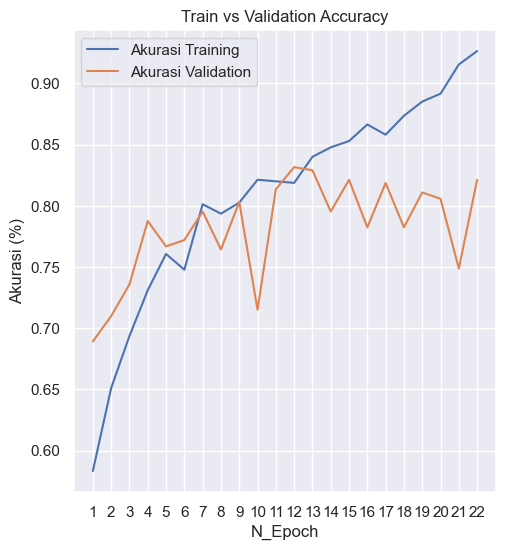

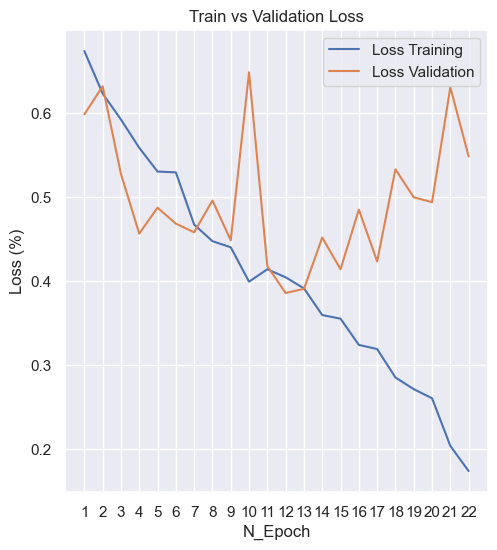

In [28]:
import seaborn as sns

epochs = [i+1 for i in range(len(hasil.history['accuracy']))]

sns.set_theme()

plt.figure(figsize=(12,6))

#--------------------------------Subplot Akurasi--------------------------------
plt.subplot(1,2,1)
sns.lineplot(
    x=epochs, 
    y=hasil.history['accuracy'], 
    label= 'Akurasi Training'
)
sns.lineplot(
    x=epochs, 
    y=hasil.history['val_accuracy'], 
    label= 'Akurasi Validation'
)

plt.xticks(epochs)
plt.ylabel('Akurasi (%)')
plt.xlabel('N_Epoch')
plt.title('Train vs Validation Accuracy')

plt.show()


#--------------------------------Subplot Loss--------------------------------
plt.figure(figsize=(12,6))
plt.subplot(1,2,2)
sns.lineplot(
    x=epochs, 
    y=hasil.history['loss'], 
    label= 'Loss Training'
)
sns.lineplot(
    x=epochs, 
    y=hasil.history['val_loss'], 
    label= 'Loss Validation'
)

plt.xticks(epochs)
plt.ylabel('Loss (%)')
plt.xlabel('N_Epoch')
plt.title('Train vs Validation Loss')

plt.show()

<a class="anchor" id="bag5_3_2"></a>
### Visualisasi Subplot Model Validation

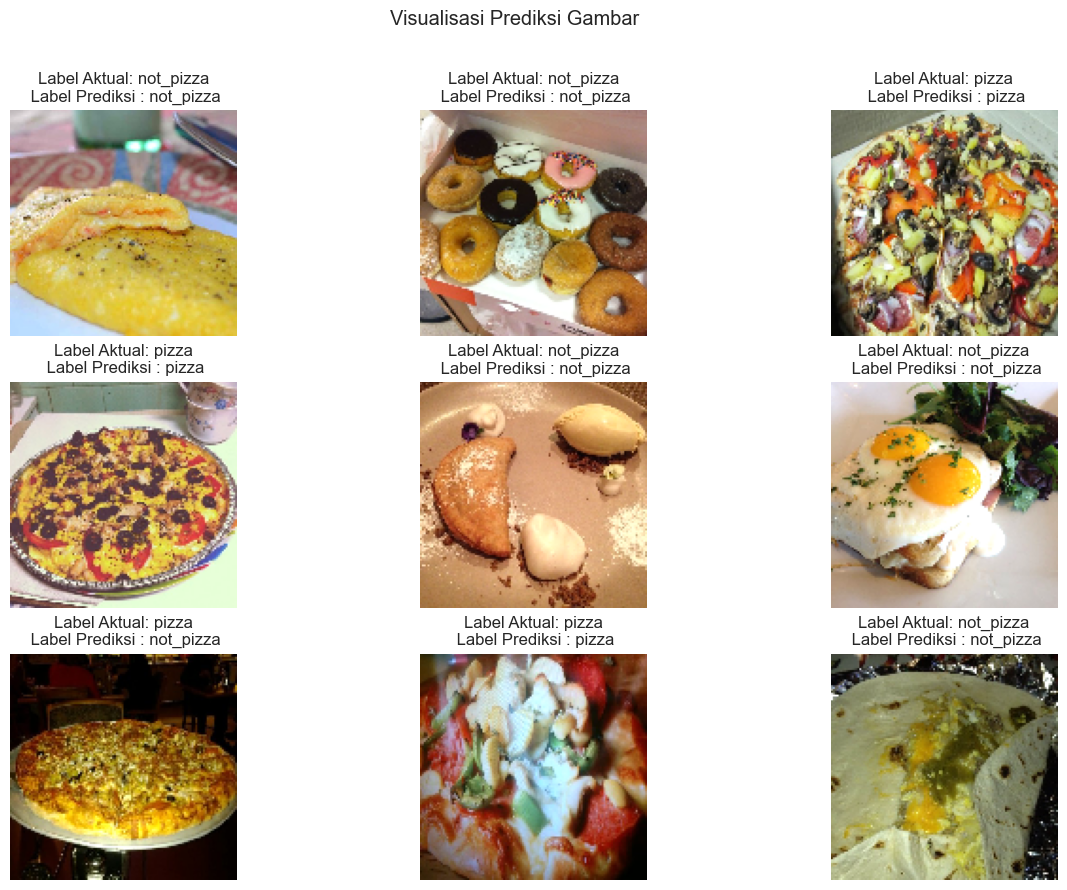

In [29]:
image, label = ds_val.next()

plt.figure(figsize=(15,10))
plt.suptitle('Visualisasi Prediksi Gambar')

for i in range(9):
    actual_label = label[i]
    predict_label = 0 if model.predict(image[i][None,...],verbose=0)[0] <= 0.5 else 1
    plt.subplot(3,3,i+1)
    plt.title(f'Label Aktual: {class_names[int(actual_label)]}\n Label Prediksi : {class_names[predict_label]}')
    plt.axis('off')
    plt.imshow(tf.squeeze(image[i]))

<a class="anchor" id="bag5_3_3"></a>
### Visualisasi C. Matrix Model Validation

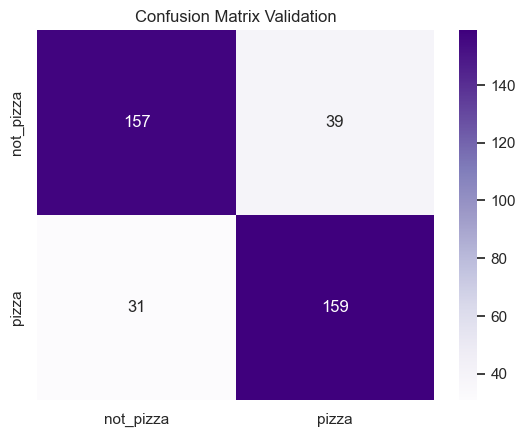

In [30]:
from sklearn.metrics import confusion_matrix

image = []
label = []

for i in range(len(ds_val)):
    im, lb = ds_val[i]
    for i in range(len(lb)):
        label.append(lb[i])
        image.append(im[i])
    
label_pred = [0 if model.predict(image[i][None,...],verbose=0)[0] <= 0.5 else 1 for i in range(len(label))]

cm = confusion_matrix(label, label_pred)

sns.heatmap(cm,
            annot=True,
            fmt='d',
            xticklabels=class_names,
            yticklabels=class_names, 
            cmap = "Purples"
           )
plt.title("Confusion Matrix Validation")
plt.show()

<a class="anchor" id="bag6"></a>
# [6] Prediksi Data Test

<a class="anchor" id="bag6_1"></a>
## Import Data Test

In [31]:
test_path = os.path.join(destination, "test")

# TEST
print("\nTEST")
ds_test = dgen.flow_from_directory(
    test_path,
    target_size = targetSize,
    batch_size = 16,
    shuffle = True,
    seed=0,
    class_mode='binary'
)

print("-- Dengan Shape:", ds_test[0][0].shape)


TEST
Found 193 images belonging to 2 classes.
-- Dengan Shape: (16, 120, 120, 3)


<a class="anchor" id="bag6_2"></a>
## Evaluasi Model Data Test

In [32]:
test = model.evaluate(ds_test, verbose=0)

table2 = PrettyTable(["Keterangan", "Nilai"])
table2.align = "l"

table2.add_row([" Loss Testing", test[0]])
table2.add_row([" Akurasi Testing", test[1]])

print(table2)

+------------------+---------------------+
| Keterangan       | Nilai               |
+------------------+---------------------+
|  Loss Testing    | 0.25984299182891846 |
|  Akurasi Testing | 0.9274611473083496  |
+------------------+---------------------+


<a class="anchor" id="bag6_3"></a>
## Visualisasi Prediksi Data Test

<a class="anchor" id="bag6_3_1"></a>
### Subplot Prediksi Data Test

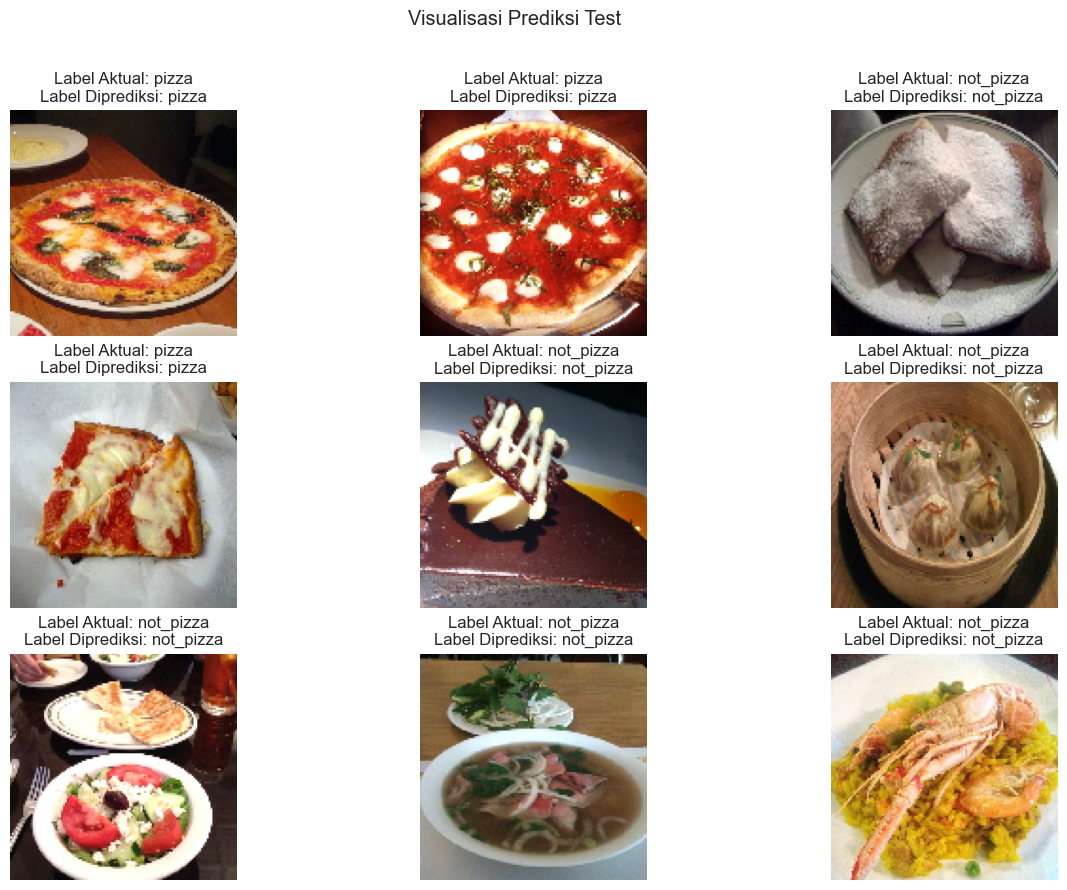

In [33]:
image_test = []
label_test = []

for i in range(len(ds_test)):
    im, lb = ds_test[i]
    for i in range(len(lb)):
        label_test.append(lb[i])
        image_test.append(im[i])
    
label_test_pred = [0 if model.predict(image_test[i][None,...],verbose=0)[0] <= 0.5 else 1 for i in range(len(label_test))]


plt.figure(figsize=(15,10))
plt.suptitle('Visualisasi Prediksi Test')

for i in range(9):
    predict_label = label_test_pred[i]
    plt.subplot(3,3,i+1)
    plt.title(f'Label Aktual: {class_names[int(label_test[i])]}\nLabel Diprediksi: {class_names[predict_label]}')
    plt.axis('off')
    plt.imshow(tf.squeeze(image_test[i]))

<a class="anchor" id="bag6_3_2"></a>
### C. Matrix Prediksi Data Test

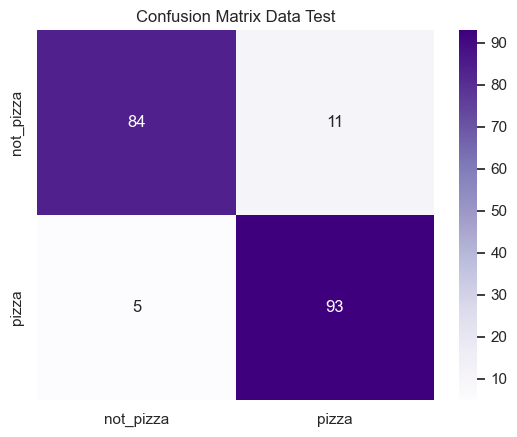

In [34]:
cm = confusion_matrix(label_test, label_test_pred)

sns.heatmap(cm,
            annot=True,
            fmt='d',
            xticklabels=class_names,
            yticklabels=class_names, 
            cmap = "Purples"
           )
plt.title("Confusion Matrix Data Test")
plt.show()